# Analysis of results of the 2015 FINA World Swimming Championships
> In this chapter, you will practice your EDA, parameter estimation, and hypothesis testing skills on the results of the 2015 FINA World Swimming Championships. This is the Summary of lecture "Case Studies in Statistical Thinking", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Statistics]
- image: images/swim_slowdown.png

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dc_stat_think as dcst

plt.rcParams['figure.figsize'] = (10, 5)

## Introduction to swimming data
- Strokes at the World Championships
    - Freestyle
    - Breaststroke
    - Butterfly
    - Backstroke
- Events at the World Championships
    - Defined by gender, distance, stroke
- Rounds of events
    - Heats: First round
    - Semifinals: Penultimate round in some events
    - Finals: The final round; the winner is champion
- Data source
    - Data are freely available from [OMEGA](http://www.omegatiming.com)
- Domain-specific knowledge
    - Imperative
    - An absolute pleasure

### Graphical EDA of men's 200 free heats
In the heats, all contestants swim, the very fast and the very slow. To explore how the swim times are distributed, plot an ECDF of the men's 200 freestyle.



In [2]:
swim = pd.read_csv('./dataset/2015_FINA.csv', skiprows=4)
swim.head()

athleteid lastname firstname   birthdate gender     name code  eventid  \
0     100784   BORSHI      NOEL  1996-02-13      F  Albania  ALB        1   
1     100784   BORSHI      NOEL  1996-02-13      F  Albania  ALB        1   
2     100784   BORSHI      NOEL  1996-02-13      F  Albania  ALB       20   
3     100784   BORSHI      NOEL  1996-02-13      F  Albania  ALB       20   
4     100784   BORSHI      NOEL  1996-02-13      F  Albania  ALB       20   

   heat  lane  ...  swimtime  split  cumswimtime  splitdistance  daytime  \
0     1     4  ...     63.65      1        29.63             50    930.0   
1     1     4  ...     63.65      2        63.65            100    930.0   
2     1     8  ...    140.28      1        31.33             50   1014.0   
3     1     8  ...    140.28      2        66.81            100   1014.0   
4     1     8  ...    140.28      3       103.29            150   1014.0   

   round  distance relaycount  stroke  splitswimtime  
0    PRE       100          1     FLY          29.63  
1    PRE       100          1     FLY          34.02  
2    PRE       200          1     FLY          31.33  
3    PRE       200          1     FLY          35.48  
4    PRE       200          1     FLY          36.48  

[5 rows x 22 columns]

In [3]:
mens_200_free_heats_df = swim[(swim['gender'] == 'M') & 
                           (swim['distance'] == 200) & 
                           (swim['stroke'] == 'FREE') &
                           (swim['round'] == 'PRE') &
                          (swim['split'] == 4)]
mens_200_free_heats = mens_200_free_heats_df['cumswimtime'].unique()

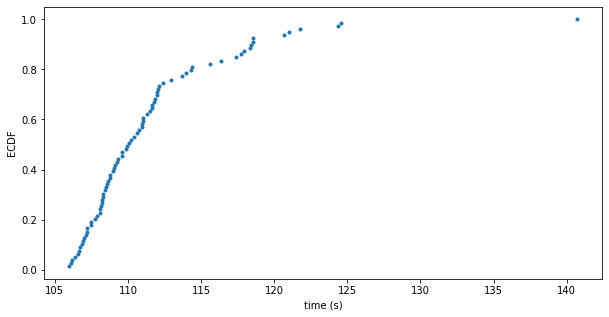

In [4]:
# Generate x and y values for ECDF: x, y
x, y = dcst.ecdf(mens_200_free_heats)

# Plot the ECDF as dots
_ = plt.plot(x, y, marker='.', linestyle='none')

# Label axes and show plot
_ = plt.xlabel('time (s)')
_ = plt.ylabel('ECDF')

We see that fast swimmers are below 115 seconds, with a smattering of slow swimmers past that, including one very slow swimmer.

### 200 m free time with confidence interval
Now, you will practice parameter estimation and computation of confidence intervals by computing the mean and median swim time for the men's 200 freestyle heats. The median is useful because it is immune to heavy tails in the distribution of swim times, such as the slow swimmers in the heats.

In [5]:
# Compute mean and median swim times
mean_time = np.mean(mens_200_free_heats)
median_time = np.median(mens_200_free_heats)

# Draw 10,000 bootstrap replicates of the mean and median
bs_reps_mean = dcst.draw_bs_reps(mens_200_free_heats, np.mean, size=10000)
bs_reps_median = dcst.draw_bs_reps(mens_200_free_heats, np.median, size=10000)

# Compute the 95% confidence intervals
conf_int_mean = np.percentile(bs_reps_mean, [2.5, 97.5])
conf_int_median = np.percentile(bs_reps_median, [2.5, 97.5])

# Print the result to the screen
print("""
mean time: {0:.2f} sec.
95% conf int of mean: [{1:.2f}, {2:.2f}] sec.

median time: {3:.2f} sec.
95% conf int of median: [{4:.2f}, {5:.2f}] sec.
""".format(mean_time, *conf_int_mean, median_time, *conf_int_median))


mean time: 111.63 sec.
95% conf int of mean: [110.49, 112.92] sec.

median time: 110.04 sec.
95% conf int of median: [108.96, 111.01] sec.



## Do swimmers go faster in the finals?
- Question : Do swimmers swim faster in the finals than in other rounds?
    - Individual swimmers, or the whole field?
    - Faster than heats? Faster than semifinals?
    - For what strokes? For what distances?
    
- Question: Do individual female swimmers swim faster in the finals compared to the semifinals?
    - Events: 50, 100, 200 meter freestyle, breaststroke, butterfly, backstroke
    
- Fractional improvement

$$ f = \frac{\text{semifinals time} - \text{finals time}}{\text{semifinals time}} $$

- Sharpened questions
    - What is the frational improvement of individual female swimmers from the semifinals to the finals?
    - Is the observed fractional improvement commensurate with there being no difference in performance in the semifinals and finals?

### EDA: finals versus semifinals
First, you will get an understanding of how athletes' performance changes from the semifinals to the finals by computing the fractional improvement from the semifinals to finals and plotting an ECDF of all of these values.

The arrays `final_times` and `semi_times` contain the swim times of the respective rounds. The arrays are aligned such that `final_times[i]` and `semi_times[i]` are for the same swimmer/event. If you are interested in the strokes/events, you can check out the data frame df in your namespace, which has more detailed information, but is not used in the analysis.

In [6]:
women_swim_df = swim[(swim['gender'] == "F") & 
                     (swim['stroke'] != "MEDLEY") & 
                     (swim['distance'].isin([100, 50, 200])) & 
                     (swim['round'].isin(['SEM', 'FIN'])) & 
                     (swim['splitdistance'] == swim['distance'])]
women_swim_df.head(n = 5)

athleteid  lastname firstname   birthdate gender       name code  \
303     100537  CAMPBELL    BRONTE  1994-05-14      F  Australia  AUS   
305     100537  CAMPBELL    BRONTE  1994-05-14      F  Australia  AUS   
307     100537  CAMPBELL    BRONTE  1994-05-14      F  Australia  AUS   
308     100537  CAMPBELL    BRONTE  1994-05-14      F  Australia  AUS   
315     100631  CAMPBELL      CATE  1992-05-20      F  Australia  AUS   

     eventid  heat  lane  ...  swimtime  split  cumswimtime  splitdistance  \
303      223     2     5  ...     53.00      2        53.00            100   
305      123     1     3  ...     52.52      2        52.52            100   
307      234     2     6  ...     24.32      1        24.32             50   
308      134     1     6  ...     24.12      1        24.12             50   
315      223     1     4  ...     52.84      2        52.84            100   

     daytime  round  distance relaycount  stroke  splitswimtime  
303   1732.0    SEM       100          1    FREE          27.44  
305   1732.0    FIN       100          1    FREE          27.37  
307   1828.0    SEM        50          1    FREE          24.32  
308   1805.0    FIN        50          1    FREE          24.12  
315   1732.0    SEM       100          1    FREE          27.49  

[5 rows x 22 columns]

In [7]:
women_swim_df = women_swim_df[['athleteid', 'stroke', 'distance', 'lastname', 'cumswimtime', 'round']]

In [8]:
women_swim_df_fin = women_swim_df.loc[(women_swim_df['round'] == 'FIN')]
women_swim_df_sem = women_swim_df.loc[(women_swim_df['round'] == 'SEM')]

women_swim_df_w = women_swim_df_fin.merge(women_swim_df_sem, how = 'left', on = ['athleteid', 'stroke', 'distance', 'lastname'])

df = women_swim_df_w.rename(index = str, columns = {"cumswimtime_x" : "final_swimtime", "cumswimtime_y" : "semi_swimtime"})
df = df[['athleteid', 'stroke', 'distance', 'lastname', 'final_swimtime', 'semi_swimtime']]

final_times = df['final_swimtime'].values
semi_times = df['semi_swimtime'].values

In [9]:
df

athleteid  stroke  distance    lastname  final_swimtime  semi_swimtime
0      100537    FREE       100    CAMPBELL           52.52          53.00
1      100537    FREE        50    CAMPBELL           24.12          24.32
2      100631    FREE       100    CAMPBELL           52.82          52.84
3      100631    FREE        50    CAMPBELL           24.36          24.22
4      100650     FLY       100      MCKEON           57.67          57.59
..        ...     ...       ...         ...             ...            ...
91     105595    BACK       200    FRANKLIN          126.34         127.79
92     105607  BREAST        50       HARDY           30.20          30.25
93     105640     FLY       200  MCLAUGHLIN          126.95         127.52
94     105676    BACK       100       BAKER           59.99          59.63
95     105686     FLY       200       ADAMS          126.40         127.57

[96 rows x 6 columns]

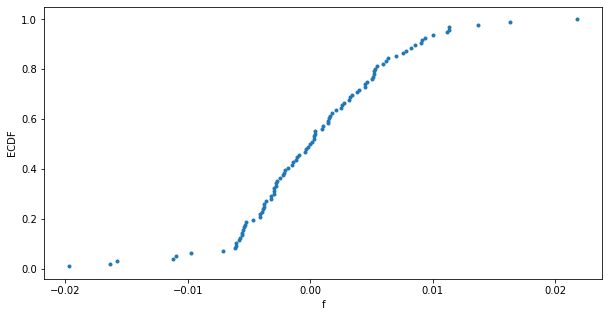

In [10]:
# Compute fractional difference in time between finals and semis
f = (df['semi_swimtime'] - df['final_swimtime']) / df['semi_swimtime']

# Generate x and y values for the ECDF: x, y
x, y = dcst.ecdf(f)

# Make a plot of the ECDF
_ = plt.plot(x, y, marker='.', linestyle='none')

# Label axes
_ = plt.xlabel('f')
_ = plt.ylabel('ECDF')

The median of the ECDF is juuuust above zero. But at first glance, it does not look like there is much of any difference between semifinals and finals. 

### Parameter estimates of difference between finals and semifinals
Compute the mean fractional improvement from the semifinals to finals, along with a 95% confidence interval of the mean.

In [11]:
# Mean fractional time difference: f_mean
f_mean = np.mean(f)

# Get bootstrap reps of means: bs_reps
bs_reps = dcst.draw_bs_reps(f, np.mean, size=10000)

# Compute confidence intervals: conf_int
conf_int = np.percentile(bs_reps, [2.5, 97.5])

# Report
print("""
mean frac. diff.: {0:.5f}
95% conf int of mean frac. diff.: [{1:.5f}, {2:.5f}]""".format(f_mean, *conf_int))


mean frac. diff.: 0.00040
95% conf int of mean frac. diff.: [-0.00093, 0.00173]


It looks like the mean finals time is juuuust faster than the mean semifinal time, and they very well may be the same. We'll test this hypothesis next.

### How to do the permutation test
Based on our EDA and parameter estimates, it is tough to discern improvement from the semifinals to finals. In the next exercise, you will test the hypothesis that there is no difference in performance between the semifinals and finals. A permutation test is fitting for this. We'll get test statistics with following strategy:
- Take an array of semifinal times and an array of final times for each swimmer for each stroke/distance pair.
- Go through each array, and for each index, swap the entry in the respective final and semifinal array with a 50% probability.
- Use the resulting final and semifinal arrays to compute f and then the mean of f.


### Generating permutation samples
As you worked out in the last exercise, we need to generate a permutation sample by randomly swapping corresponding entries in the `semi_times` and `final_times` array. Write a function with signature `swap_random(a, b)` that returns arrays where random indices have the entries in a and b swapped.

In [12]:
def swap_random(a, b):
    """Randomly swap entries in two arrays"""
    # Indices to swap
    swap_inds = np.random.random(size=len(a)) < 0.5
    
    # Make copies of arrays a and b for output
    a_out = np.copy(a)
    b_out = np.copy(b)
    
    # Swap values
    a_out[swap_inds] = b[swap_inds]
    b_out[swap_inds] = a[swap_inds]
    
    return a_out, b_out

### Hypothesis test: Do women swim the same way in semis and finals?
Test the hypothesis that performance in the finals and semifinals are identical using the mean of the fractional improvement as your test statistic. The test statistic under the null hypothesis is considered to be at least as extreme as what was observed if it is greater than or equal to `f_mean`.

In [13]:
# Set up array of permutation replicates
perm_reps = np.empty(1000)

for i in range(1000):
    # Generate a permutation sample
    semi_perm, final_perm = swap_random(semi_times, final_times)
    
    # Compute f from the permutation sample
    f = (semi_perm - final_perm) / semi_perm
    
    # Compute and store permutation replicate
    perm_reps[i] = np.mean(f)
    
# Compute and print p-value
print('p =', np.sum(perm_reps >= f_mean) / 1000)

p = 0.255


The p-value is large, about 0.28, which suggests that the results of the 2015 World Championships are consistent with there being no difference in performance between the finals and semifinals.

## How does the performance of swimmers decline over long events?
- Swimming background
    - Split: The time is takes to swim one length of the pool
- Quantifying slowdown
    - Use women's 800m freestyle heats
    - Omit first and last 100 meters
    - Compute mean split time for each split number
    - Perform linear regression to get slowdown per split
    - Perform hypothesis test: can the slowdown be explained by random variation?
- Hypothesis tests for correlation
    - Posit null hypothesis: split time and split number are completely uncorrelated
    - Simulate data assuming null hypothesis is true
    - Use pearson correlation, $\rho$ as test statistic
    - Compute p-value as the fraction of replicates that have $\rho$ at least as large as observed

### EDA: Plot all your data
To get a graphical overview of a data set, it is often useful to plot all of your data. In this exercise, plot all of the splits for all female swimmers in the 800 meter heats. The data are available in a Numpy arrays `split_number` and `splits`. The arrays are organized such that `splits[i,j]` is the split time for swimmer i for `split_number[j]`.

In [14]:
free_800_w = swim.loc[(swim['gender'] == 'F') &
                  (swim['stroke'] == 'FREE') &
                  (swim['distance'] == 800) &
                  (swim['round'].isin(['PRE'])) &
                  (~swim['split'].isin([1,2,15,16]))]
free_800_w = free_800_w[['split', 'splitswimtime']]

In [15]:
splits = np.reshape(free_800_w['splitswimtime'].values, (-1, 12))
split_number = free_800_w['split'].unique()

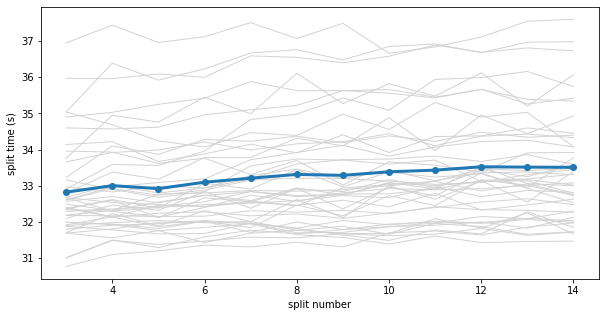

In [16]:
# Plot the splits for each swimmer
for splitset in splits:
    _ = plt.plot(split_number, splitset, linewidth=1, color='lightgray')
    
# Compute the mean split times
mean_splits = np.mean(splits, axis=0)

# Plot the mean split time
_ = plt.plot(split_number, mean_splits, marker='.', linewidth=3, markersize=12)

# Label axes
_ = plt.xlabel('split number')
_ = plt.ylabel('split time (s)')

You can see that there is wide variability in the splits among the swimmers, and what appears to be a slight trend toward slower split times.

### Linear regression of average split time
We will assume that the swimmers slow down in a linear fashion over the course of the 800 m event. The slowdown per split is then the slope of the mean split time versus split number plot. Perform a linear regression to estimate the slowdown per split and compute a pairs bootstrap 95% confidence interval on the slowdown. Also show a plot of the best fit line.

> Note: We can compute error bars for the mean split times and use those in the regression analysis, but we will not take those into account here, as that is beyond the scope of this course.


mean slowdown: 0.065 sec./split
95% conf int of mean slowdown: [0.052, 0.079] sec./split


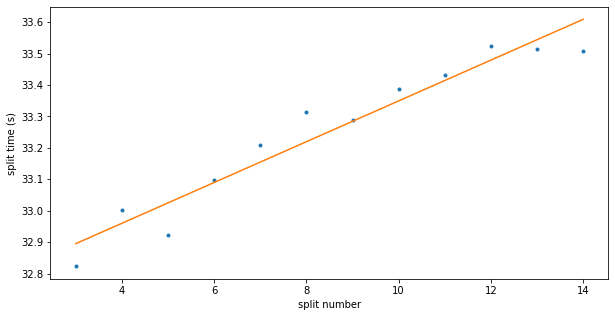

In [19]:
# Perform regression
slowdown, split_3 = np.polyfit(split_number, mean_splits, 1)

# Compute pairs bootstrap
bs_reps, _ = dcst.draw_bs_pairs_linreg(split_number, mean_splits, size=10000)

# Compute confidence interval
conf_int = np.percentile(bs_reps, [2.5, 97.5])

# Plot the data with regressions line
_ = plt.plot(split_number, mean_splits, marker='.', linestyle='none')
_ = plt.plot(split_number, slowdown * split_number + split_3, '-')

# Label axes and show plot
_ = plt.xlabel('split number')
_ = plt.ylabel('split time (s)')

# Print the slowdown per split
print("""
mean slowdown: {0:.3f} sec./split
95% conf int of mean slowdown: [{1:.3f}, {2:.3f}] sec./split""".format(
    slowdown, *conf_int))

There is a small (about 6 hundreths of a second), but discernible, slowdown per split. We'll do a hypothesis test next.

### Hypothesis test: are they slowing down?
Now we will test the null hypothesis that the swimmer's split time is not at all correlated with the distance they are at in the swim. We will use the Pearson correlation coefficient (computed using dcst.pearson_r()) as the test statistic.

In [18]:
# Observed correlation
rho = dcst.pearson_r(split_number, mean_splits)

# Initialize permutation reps
perm_reps_rho = np.empty(10000)

# Make permutation reps
for i in range(10000):
    # Scramble_split number array
    scrambled_split_number = np.random.permutation(split_number)
    
    # Compute the Pearson correlation coefficient
    perm_reps_rho[i] = dcst.pearson_r(scrambled_split_number, mean_splits)
    
# Compute and print p-value
p_val = np.sum(perm_reps_rho >= rho) / 10000
print('p =', p_val)

p = 0.0


The tiny effect is very real! With 10,000 replicates, we never got a correlation as big as observed under the hypothesis that the swimmers do not change speed as the race progresses. In fact, I did the test with a million replicates, and still never got a single replicate as big as the observed Pearson correlation coefficient.